# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [3]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [4]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    mapping = {j: num for num, j in enumerate(list(df[i].unique()))}
    for key, value in mapping.items():
        print(f"{key} = {value}")
    
    # Bruk .map() for trygg oppdatering av kolonnen
    df[i] = df[i].map(mapping)
    
    # Konverter til numerisk etter mapping
    df[i] = pd.to_numeric(df[i])


-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [5]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [6]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

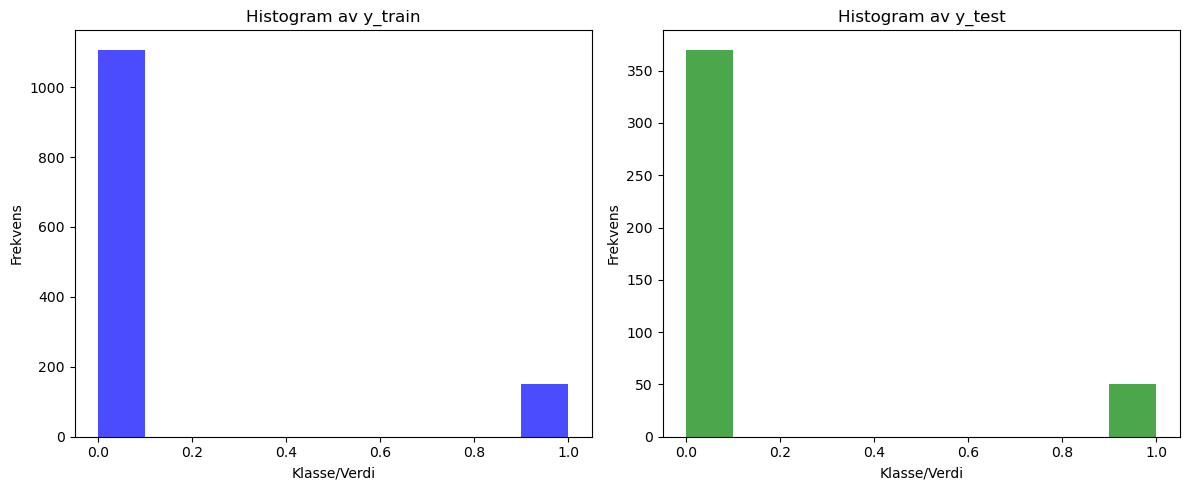

In [7]:
#TODO: visualiser y_train og y_test i et histogram
import matplotlib.pyplot as plt

# Visualisere y_train
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=10, color='blue', alpha=0.7)
plt.title("Histogram av y_train")
plt.xlabel("Klasse/Verdi")
plt.ylabel("Frekvens")

# Visualisere y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=10, color='green', alpha=0.7)
plt.title("Histogram av y_test")
plt.xlabel("Klasse/Verdi")
plt.ylabel("Frekvens")

plt.tight_layout()
plt.show()


**Svar:**

*Histogrammene for y_train og y_test viser en skjev fordeling, hvor majoriteten av verdiene er sentrert rundt 0 (de ansatte som ikke har sluttet), mens en mindre andel av verdiene er sentrert rundt 1 (de ansatte som har sluttet). Denne fordelingen indikerer at y ("Attrition") er en binær variabel som representerer om en ansatt har sluttet eller ikke, og problemet vi skal løse derfor er et klassifikasjonsproblem.*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


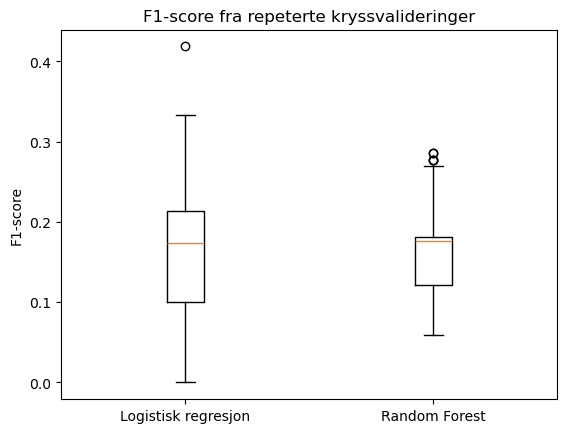

Logistisk regresjon - F1-score: 0.168, Accuracy: 0.879
Random Forest - F1-score: 0.164, Accuracy: 0.888
T-statistikk: 0.270, P-verdi: 0.788
Det er ingen statistisk signifikant forskjell mellom modellene.


In [8]:
#TODO: repeterte kryssvalideringer for to modeller
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

# Definere modeller
model1 = LogisticRegression(random_state=0, max_iter=1000)
model2 = RandomForestClassifier(random_state=0)

# Kryssvalidering
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# Beregn F1-score og accuracy for modellene
f1_scores_model1 = cross_val_score(model1, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
accuracy_model1 = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

f1_scores_model2 = cross_val_score(model2, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
accuracy_model2 = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Visualisere F1-scorene
plt.boxplot([f1_scores_model1, f1_scores_model2], tick_labels=['Logistisk regresjon', 'Random Forest'])
plt.title("F1-score fra repeterte kryssvalideringer")
plt.ylabel("F1-score")
plt.show()

# Utføre en to-sidig t-test
t_stat, p_val = ttest_ind(f1_scores_model1, f1_scores_model2)

print(f"Logistisk regresjon - F1-score: {np.mean(f1_scores_model1):.3f}, Accuracy: {np.mean(accuracy_model1):.3f}")
print(f"Random Forest - F1-score: {np.mean(f1_scores_model2):.3f}, Accuracy: {np.mean(accuracy_model2):.3f}")
print(f"T-statistikk: {t_stat:.3f}, P-verdi: {p_val:.3f}")

if p_val < 0.05:
    print("Det er en statistisk signifikant forskjell mellom modellene.")
else:
    print("Det er ingen statistisk signifikant forskjell mellom modellene.")


**Svar:**

*De repeterte kryssvalideringene viser at både logistisk regresjon og Random Forest presterer på et sammenlignbart nivå. Logistisk regresjon oppnår en gjennomsnittlig F1-score på 0.168 og en accuracy på 0.879, mens Random Forest har en gjennomsnittlig F1-score på 0.164 og en accuracy på 0.888. Selv om Random Forest har en noe høyere accuracy, er forskjellen i F1-score minimal, noe som antyder at begge modellene har lignende ytelse når det gjelder balansen mellom presisjon og sensitivitet.*

*Ved hjelp av en to-sidig t-test på F1-scorene ble det undersøkt om forskjellen mellom modellene er statistisk signifikant. T-testen ga en t-statistikk på 0.270 og en p-verdi på 0.788, som er betydelig høyere enn signifikansnivået på 0.05. Dette indikerer at det ikke er noen statistisk signifikant forskjell mellom ytelsen til de to modellene.*

*Basert på dette resultatet kan vi konkludere med at begge modellene er like godt egnet for denne problemstillingen. Den manglende signifikante forskjellen antyder at problemstillingen ikke nødvendigvis krever en mer kompleks modell som Random Forest, og at logistisk regresjon kan være et godt valg på grunn av sin enkelhet og effektivitet. Det er imidlertid verdt å merke seg at ingen av modellene oppnår særlig høy F1-score, noe som tyder på at ubalanserte data kan være en utfordring som krever ytterligere tiltak, for eksempel bruk av SMOTE for oppsampling.*

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

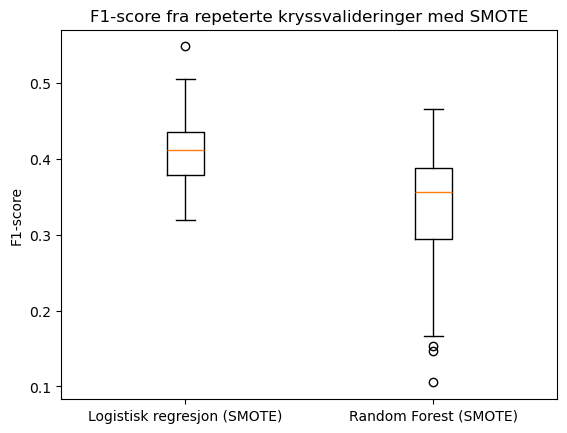

Logistisk regresjon (SMOTE) - F1-score: 0.411, Accuracy: 0.763
Random Forest (SMOTE) - F1-score: 0.336, Accuracy: 0.889
T-statistikk: 5.844, P-verdi: 0.000
Det er en statistisk signifikant forskjell mellom modellene.


In [9]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Standardiser dataene for å sikre kompatibilitet
scaler = StandardScaler()

# Definer pipelines
pipeline1 = Pipeline(steps=[('scaler', scaler), ('smote', SMOTE(random_state=42)), ('model', LogisticRegression(random_state=42, max_iter=1000))])
pipeline2 = Pipeline(steps=[('scaler', scaler), ('smote', SMOTE(random_state=42)), ('model', RandomForestClassifier(random_state=42))])

# Kryssvalidering
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Beregn F1-score og accuracy for modellene
f1_scores_pipeline1 = cross_val_score(pipeline1, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
accuracy_pipeline1 = cross_val_score(pipeline1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

f1_scores_pipeline2 = cross_val_score(pipeline2, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
accuracy_pipeline2 = cross_val_score(pipeline2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Visualisere F1-scorene
plt.boxplot([f1_scores_pipeline1, f1_scores_pipeline2], tick_labels=['Logistisk regresjon (SMOTE)', 'Random Forest (SMOTE)'])
plt.title("F1-score fra repeterte kryssvalideringer med SMOTE")
plt.ylabel("F1-score")
plt.show()

# Utføre en to-sidig t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(f1_scores_pipeline1, f1_scores_pipeline2)

print(f"Logistisk regresjon (SMOTE) - F1-score: {np.mean(f1_scores_pipeline1):.3f}, Accuracy: {np.mean(accuracy_pipeline1):.3f}")
print(f"Random Forest (SMOTE) - F1-score: {np.mean(f1_scores_pipeline2):.3f}, Accuracy: {np.mean(accuracy_pipeline2):.3f}")
print(f"T-statistikk: {t_stat:.3f}, P-verdi: {p_val:.3f}")

if p_val < 0.05:
    print("Det er en statistisk signifikant forskjell mellom modellene.")
else:
    print("Det er ingen statistisk signifikant forskjell mellom modellene.")

**Svar:**

*Etter å ha brukt SMOTE for å balansere datasettet, ser vi betydelige forskjeller i ytelsen mellom de to modellene. Logistisk regresjon oppnådde en F1-score på 0.411 og en accuracy på 0.763, noe som representerer en betydelig forbedring i F1-score sammenlignet med resultatene fra oppgave 2.2. Denne forbedringen viser at modellen nå er bedre egnet til å håndtere den ubalanserte klassen og oppnå en mer balansert prediksjonsytelse, selv om accuracy gikk noe ned.*

*Random Forest, på den andre siden, oppnådde en F1-score på 0.336 og en accuracy på 0.889. Selv om accuracy fortsatt er høy, ser vi at forbedringen i F1-score ikke er like stor som for logistisk regresjon. Dette kan indikere at Random Forest fortsatt har utfordringer med å håndtere minoritetsklassen fullt ut, selv etter bruk av SMOTE.*

*En statistisk analyse av forskjellen mellom modellene med en to-sidig t-test viste en t-statistikk på 5.844 og en p-verdi på 0.000, som er betydelig under det vanlige signifikansnivået på 0.05. Dette bekrefter at forskjellen i F1-score mellom de to modellene er statistisk signifikant, og at logistisk regresjon presterer bedre enn Random Forest i denne oppgaven.*

*Samlet sett ser vi at SMOTE bidrar til bedre balanse mellom klassene, spesielt for logistisk regresjon. Dette gjør logistisk regresjon til en bedre kandidat for videre analyse, selv om begge modellene kunne dra nytte av ytterligere justering av hyperparametere for ytterligere forbedringer.*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [10]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Tren den beste modellen på hele treningssettet
final_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=0)),
    ('model', LogisticRegression(random_state=0, max_iter=1000))
])

final_model.fit(X_train, y_train)

# Gjør prediksjoner på testsettet
y_pred = final_model.predict(X_test)

# Beregn metrikker
accuracy = accuracy_score(y_test, y_pred)
presisjon = precision_score(y_test, y_pred)
sensitivitet = recall_score(y_test, y_pred)  # Recall
f1 = f1_score(y_test, y_pred)

# Utregn spesifisitet manuelt fra forvirringsmatrisen
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
spesifisitet = tn / (tn + fp)

# Presentasjon av resultatene
print("Modellens ytelse på testsettet:")
print(f"- Accuracy (treffsikkerhet): {accuracy:.3f}")
print(f"- Presisjon: {presisjon:.3f}")
print(f"- Sensitivitet: {sensitivitet:.3f}")
print(f"- Spesifisitet: {spesifisitet:.3f}")
print(f"- F1-skår: {f1:.3f}")

# Oppsummerende rapport (valgfritt for mer detaljer)
print("\nDetaljert klassifikasjonsrapport:")
print(classification_report(y_test, y_pred, target_names=["Slutter ikke i jobben", "Slutter i jobben"]))

Modellens ytelse på testsettet:
- Accuracy (treffsikkerhet): 0.764
- Presisjon: 0.310
- Sensitivitet: 0.800
- Spesifisitet: 0.759
- F1-skår: 0.447

Detaljert klassifikasjonsrapport:
                       precision    recall  f1-score   support

Slutter ikke i jobben       0.97      0.76      0.85       370
     Slutter i jobben       0.31      0.80      0.45        50

             accuracy                           0.76       420
            macro avg       0.64      0.78      0.65       420
         weighted avg       0.89      0.76      0.80       420



#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [11]:
#TODO: Gjør kjønnsbasert analyse på testdataene
# Filtrer testsettet etter kjønn
X_test_men = X_test[X_test['Gender'] == 0]
y_test_men = y_test[X_test['Gender'] == 0]

X_test_women = X_test[X_test['Gender'] == 1]
y_test_women = y_test[X_test['Gender'] == 1]

# Gjør prediksjoner for hver gruppe
y_pred_men = final_model.predict(X_test_men)
y_pred_women = final_model.predict(X_test_women)

# Funksjon for å beregne ytelsesmålinger
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    presisjon = precision_score(y_true, y_pred)
    sensitivitet = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)
    
    # Spesifisitet
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    spesifisitet = tn / (tn + fp)
    
    return accuracy, presisjon, sensitivitet, spesifisitet, f1

# Beregn metrikker for menn
metrics_men = calculate_metrics(y_test_men, y_pred_men)
metrics_women = calculate_metrics(y_test_women, y_pred_women)

# Vis resultatene
print("Modellens ytelse for menn:")
print(f"- Accuracy: {metrics_men[0]:.3f}")
print(f"- Presisjon: {metrics_men[1]:.3f}")
print(f"- Sensitivitet: {metrics_men[2]:.3f}")
print(f"- Spesifisitet: {metrics_men[3]:.3f}")
print(f"- F1-skår: {metrics_men[4]:.3f}")

print("\nModellens ytelse for kvinner:")
print(f"- Accuracy: {metrics_women[0]:.3f}")
print(f"- Presisjon: {metrics_women[1]:.3f}")
print(f"- Sensitivitet: {metrics_women[2]:.3f}")
print(f"- Spesifisitet: {metrics_women[3]:.3f}")
print(f"- F1-skår: {metrics_women[4]:.3f}")

Modellens ytelse for menn:
- Accuracy: 0.715
- Presisjon: 0.300
- Sensitivitet: 0.750
- Spesifisitet: 0.710
- F1-skår: 0.429

Modellens ytelse for kvinner:
- Accuracy: 0.838
- Presisjon: 0.333
- Sensitivitet: 0.929
- Spesifisitet: 0.830
- F1-skår: 0.491


*Modellen er ikke like god for begge kjønn. Selv om den oppnår høy sensitivitet for begge grupper, ser vi at ytelsen generelt er bedre for kvinner. Kvinner har høyere nøyaktighet, spesifisitet og F1-skår, noe som tyder på at modellen klarer å klassifisere denne gruppen mer presist. For menn er spesielt nøyaktigheten og spesifisiteten lavere, noe som kan indikere at modellen oftere feiler ved å feilklassifisere menn som enten har sagt opp eller ikke har sagt opp.*

*En sannsynlig årsak til dette er at treningsdatasettet kan være ubalansert med hensyn til kjønn, hvor kvinner kanskje er bedre representert i oppsigelseskategorien. Dette gir modellen flere eksempler å lære fra for denne gruppen. Det kan også være at enkelte variabler i datasettet fanger opp mønstre som er mer relevante for kvinner, mens de for menn ikke gir like tydelige prediktive signaler.*

*For å forbedre modellen kan det være nyttig å balansere datasettet bedre ved å bruke teknikker som SMOTE, slik at både menn og kvinner blir likt representert i treningen. I tillegg kan en nærmere analyse av hvilke variabler som bidrar mest til prediksjonene, avdekke skjevheter som påvirker modellens ytelse. Et annet tiltak kan være å tilpasse modellen for å sikre at den behandler begge kjønn mer likt, enten ved å justere vektleggingen av kjønn i treningen eller ved å utforske separate modeller for menn og kvinner. Slike grep kan bidra til en mer rettferdig og balansert ytelse på tvers av grupper.*

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [12]:
!pip freeze > requirements.txt